In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# 0 = blue
# 1 = red
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0],
        [2,   5,   1],
        [3.4, .5,  1],
        [3.3, .5,  0],
        [0,    6,  0]]

mystery_flower = [4.5, 1]

In [5]:
# network

#    0  flower type
#  /  \  w1, w2, b
# o    o  length, width


In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

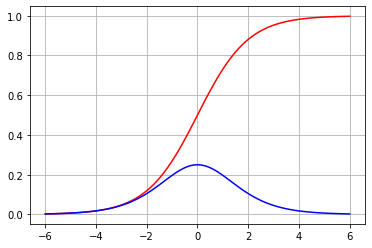

In [15]:
T = np.linspace(-6, 6, 100)
Y = sigmoid(T)
plt.grid()
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

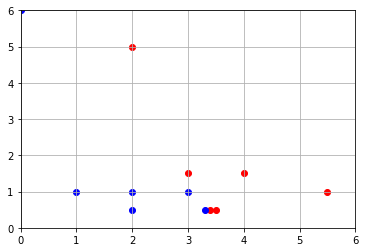

In [8]:
# scatter data

plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0], point[1], c=color)

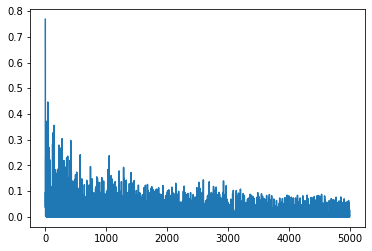

In [9]:
# training loop

learning_rate = 0.2
costs = []


w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()


for i in range(500000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
    
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
            
        costs.append(cost_sum/len(data))
    
plt.plot(costs)

In [10]:
# seeing model prediction

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.9482335044258707
[2, 1, 0]
pred: 6.296333606814714e-11
[4, 1.5, 1]
pred: 0.999999999970693
[3, 1, 0]
pred: 0.10497481191490173
[3.5, 0.5, 1]
pred: 0.9700711943714153
[2, 0.5, 0]
pred: 4.0315406916990193e-13
[5.5, 1, 1]
pred: 1.0
[1, 1, 0]
pred: 3.380069373222387e-20
[2, 5, 1]
pred: 0.999999955127653
[3.4, 0.5, 1]
pred: 0.7931493230009631
[3.3, 0.5, 0]
pred: 0.3120571613810498
[0, 6, 0]
pred: 1.5664994992952828e-07


In [11]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.9999999999998939

In [12]:
import os

In [13]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        os.system("say blue")
    else:
        os.system("say red")

In [14]:
which_flower(1, 2)